## merging webscraped and Fragrantica Kaggle for models

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

scraped = pd.read_csv("le_labo_perfumes.csv")
scraped.head()


# changing gender to unisex
scraped.loc[scraped['gender'] == 'for women and men', 'gender'] = 'unisex'
scraped.loc[scraped['gender'] == 'for women', 'gender'] = 'women'


# Print the modified DataFrame
print(scraped.head())

# scraped.to_csv('le_labo.csv', index=False)

            name  gender  rating_value rating_count  year  \
0     ambrette-9  unisex          3.70          920  2006   
1         lys-41   women          4.16        1,733  2013   
2  the-matcha-26  unisex          4.13        2,381  2021   
3      santal-33  unisex          3.77       10,002  2011   
4        baie-19  unisex          3.81        1,412  2019   

                                               notes   mainaccord1  \
0  ['ambrette (musk mallow)', 'fruity notes', 'mu...         musky   
1  ['tuberose', 'lily', 'jasmine', 'vanilla', 'mu...  white floral   
2  ['fig', 'cedar', 'matcha tea', 'bitter orange'...         woody   
3  ['sandalwood', 'leather', 'papyrus', 'virginia...         woody   
4  ['patchouli', 'ozonic notes', 'juniper berries...     patchouli   

  mainaccord2 mainaccord3 mainaccord4  
0      fruity      floral       sweet  
1    tuberose    animalic     vanilla  
2      fruity      citrus       green  
3     powdery     leather  warm spicy  
4      ozoni

### combining the datasets

In [35]:

# encoding: Windows-1252
perfumes = pd.read_csv("fra_cleaned.csv", encoding='Windows-1252',delimiter=';')

perfumes.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,"1,92",59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,NaN
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,"1,93",632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,vanilla


In [36]:

columns_to_select = [
    'Perfume', 'Brand', 'Gender', 'Rating Value', 'Rating Count', 'Year',
    'Top', 'Middle', 'Base', 'mainaccord1', 'mainaccord2', 'mainaccord3', 'mainaccord4']

perfumes = perfumes[columns_to_select]

# merge into one notes column
perfumes = perfumes.copy()

perfumes['Notes'] = perfumes[['Top', 'Middle', 'Base']].apply(lambda row: ', '.join(filter(pd.notna, row)), axis=1)


perfumes = perfumes.drop(columns=['Top', 'Middle', 'Base'])
perfumes.head()

,Perfume,Brand,Gender,Rating Value,Rating Count,Year,mainaccord1,mainaccord2,mainaccord3,mainaccord4,Notes
0,accento-overdose-pride-edition,xerjoff,unisex,"1,42",201,2022.0,rose,woody,fruity,aromatic,"fruity notes, aldehydes, green notes, bulgaria..."
1,classique-pride-2024,jean-paul-gaultier,women,"1,86",70,2024.0,citrus,white floral,sweet,fresh,"yuzu, citruses, orange blossom, neroli, musk, ..."
2,classique-pride-2023,jean-paul-gaultier,unisex,"1,91",285,2023.0,citrus,white floral,sweet,fresh spicy,"blood orange, yuzu, neroli, orange blossom, mu..."
3,pride-edition-man,bruno-banani,men,"1,92",59,2019.0,fruity,nutty,woody,tropical,"guarana, grapefruit, red apple, walnut, lavend..."
4,le-male-pride-collector,jean-paul-gaultier,men,"1,93",632,2020.0,aromatic,warm spicy,fresh spicy,cinnamon,"mint, lavender, cardamom, artemisia, bergamot,..."


In [37]:
# Lowercase column names and replace spaces with underscores
perfumes.columns = perfumes.columns.str.lower().str.replace(' ', '_')


# Convert the 'Rating Value' column to a consistent float format
perfumes['rating_value'] = perfumes['rating_value'].str.replace(',', '.').astype(float)

## add brand column to scraped
scraped['brand'] = 'le-labo'

# Append df2 to df1
kaggle_extended = pd.concat([perfumes, scraped], ignore_index=True)
kaggle_extended.shape


(24076, 12)

In [38]:
# kaggle_extended.to_csv('full_perfumes.csv', index = False)

## Turning price data into categorical luxury data using eBay data

In [39]:

womens = pd.read_csv("ebay_womens_perfume.csv")
womens.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States"


In [40]:
mens = pd.read_csv("ebay_mens_perfume.csv")
mens.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


In [41]:
# merge both datasets
both = pd.concat([womens, mens], ignore_index=True)
both.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States"


In [42]:
# finding out most expensive brands
brand_price_avg = both.groupby('brand')['price'].mean()

# sort brands by price
sorted_brands = brand_price_avg.sort_values(ascending=False)

## diplay top 10 most expensive perfume brands
print("most expensive: ")
print(sorted_brands.head(10))

# display top 10 least expensive perfume brands
print("least expensive: ")
print(sorted_brands.tail(10))



most expensive: 
brand
As picture show             189.990
Claude Marsal               180.000
fragance one                179.990
Amouage                     166.180
Christian Dior              160.990
Maison Francis Kurkdjian    149.995
Giardini Di Toscana         140.000
Topshelf                    139.990
Heaven Scents               139.990
Roja Dove                   129.990
Name: price, dtype: float64
least expensive: 
brand
Al-Rehab                 9.250000
Coty Inc.                9.210000
Pierre Cardin            8.365000
Clubman Pinaud           8.340000
Dvyne Fragrances         8.000000
Revlon                   7.990000
Assorted                 7.813333
2nd To None              6.650000
Natalie                  5.990000
Alexandria Fragrances    3.000000
Name: price, dtype: float64


In [43]:
# group by brand and caculate mean price and count
brand_price_stats = both.groupby('brand')['price'].agg(['mean', 'count'])

# filter for brands with at least 5 perfumes
brand_price_stats= brand_price_stats[brand_price_stats['count'] > 5]

# sort brands by avg price
sorted_brands = brand_price_stats.sort_values(by='mean', ascending=False)

# print 10 most expensive perfume brands and the count of them 
print("most expensive: ")
print(sorted_brands.head(20))


most expensive: 
                          mean  count
brand                                
Michael Kors        116.606667      6
Creed               116.575625     16
Parfums de Marly     74.709643     28
Jean Paul Gaultier   74.108571     14
AS SHOW              72.440000     10
Valentino            72.065238     21
Dior                 71.598000     15
PRADA                66.201818     22
Jo Malone            65.187333     30
As Show              64.999091     22
Kilian               61.954167     12
Paco Rabanne         59.397234     47
Yves Saint Laurent   58.996000     55
Bvlgari              57.745833     12
Carolina Herrera     56.150476     42
Giorgio Armani       54.732083     72
AS SHOWN             54.510000     21
HERMÈS               54.343750     16
CHANEL               54.028125     16
Gucci                53.738400     25


In [44]:
# print least expensive
print("least expensive: ")
print(sorted_brands.tail(20))

least expensive: 
                       mean  count
brand                             
J. Del Pozo       28.370000      6
Juicy Couture     27.451429     14
Donna Karan       26.337778      9
Maison Alhambra   26.243077     13
Hollister         25.815000      6
Unbranded         25.743200     50
Clinique          25.716154     13
Calvin Klein      24.866471     34
Cacharel          24.811667      6
Davidoff          24.415455     11
Liz Claiborne     23.651818     11
Avon              22.954167     12
Lattafa           22.593600     25
Kenneth Cole      22.441250      8
Lanvin            21.990000      6
Dossier           21.362857     21
Elizabeth Arden   20.383333     12
Britney Spears    19.005000      8
Elizabeth Taylor  17.981250      8
SECERTMU          11.092222      9


In [45]:
#### now group data in ur new dataset based on the groupings above
perfumes = pd.read_csv("full_perfumes.csv")

perfumes.head()

,perfume,brand,gender,rating_value,rating_count,year,mainaccord1,mainaccord2,mainaccord3,mainaccord4,notes
0,accento-overdose-pride-edition,xerjoff,unisex,1.42,201,2022.0,rose,woody,fruity,aromatic,"fruity notes, aldehydes, green notes, bulgaria..."
1,classique-pride-2024,jean-paul-gaultier,women,1.86,70,2024.0,citrus,white floral,sweet,fresh,"yuzu, citruses, orange blossom, neroli, musk, ..."
2,classique-pride-2023,jean-paul-gaultier,unisex,1.91,285,2023.0,citrus,white floral,sweet,fresh spicy,"blood orange, yuzu, neroli, orange blossom, mu..."
3,pride-edition-man,bruno-banani,men,1.92,59,2019.0,fruity,nutty,woody,tropical,"guarana, grapefruit, red apple, walnut, lavend..."
4,le-male-pride-collector,jean-paul-gaultier,men,1.93,632,2020.0,aromatic,warm spicy,fresh spicy,cinnamon,"mint, lavender, cardamom, artemisia, bergamot,..."


In [46]:
luxury_brands = sorted_brands.head(20).index  
luxury_brands = [brand.lower().replace(' ', '-') for brand in luxury_brands]

cheap_brands = sorted_brands.tail(20).index
cheap_brands = [brand.lower().replace(' ', '-') for brand in cheap_brands]


In [47]:
# check to see how many times these pop up in my other dataset
luxury_brands_not_found = []
cheap_brands_not_found = []

# luxury
for brand in luxury_brands:
    count = perfumes[perfumes['brand'] == brand].shape[0]
    if count > 0:
        print(f'found {count} perfumes for luxury brand: {brand}')
    else:
        luxury_brands_not_found.append(brand)

# non luxury
for brand in cheap_brands:
    count = perfumes[perfumes['brand'] == brand].shape[0]
    if count > 0:
        print(f'found {count} perfumes for cheap brand: {brand}')
    else:
        cheap_brands_not_found.append(brand)

# which ones could not be found
print("\nLlxury brands not found:")
print(luxury_brands_not_found)

found 45 perfumes for luxury brand: michael-kors
found 86 perfumes for luxury brand: creed
found 37 perfumes for luxury brand: parfums-de-marly
found 122 perfumes for luxury brand: jean-paul-gaultier
found 49 perfumes for luxury brand: valentino
found 196 perfumes for luxury brand: dior
found 63 perfumes for luxury brand: prada
found 104 perfumes for luxury brand: paco-rabanne
found 197 perfumes for luxury brand: yves-saint-laurent
found 97 perfumes for luxury brand: bvlgari
found 148 perfumes for luxury brand: carolina-herrera
found 185 perfumes for luxury brand: giorgio-armani
found 100 perfumes for luxury brand: chanel
found 98 perfumes for luxury brand: gucci
found 47 perfumes for cheap brand: juicy-couture
found 110 perfumes for cheap brand: donna-karan
found 55 perfumes for cheap brand: maison-alhambra
found 18 perfumes for cheap brand: hollister
found 28 perfumes for cheap brand: clinique
found 176 perfumes for cheap brand: calvin-klein
found 65 perfumes for cheap brand: cachare

- I have a feeling hermes is in there, just doesnt a thing on top of its head
- jo malone is instead jo-malone-london
- couldnt find as show and as shown, they are the ones that didnt have names
- kilian is by-kilian

In [48]:
# change luxury list
mapping = {
    'jo-malone': 'jo-malone-london',
    'kilian': 'by-kilian',
    'hermès': 'hermes'
}

luxury_brands = [mapping.get(brand, brand) for brand in luxury_brands]
luxury_brands = [brand for brand in luxury_brands if brand not in ['as-show', 'as-shown']]
luxury_brands = list(set(luxury_brands))
print(len(luxury_brands))

17


In [49]:
# for non luxury
for brand in cheap_brands:
    count = perfumes[perfumes['brand'] == brand].shape[0]
    if count > 0:
        print(f'found {count} perfumes for cheap brand: {brand}')
    else:
        cheap_brands_not_found.append(brand)



print("\ncheap brands not found:")
print(cheap_brands_not_found)

found 47 perfumes for cheap brand: juicy-couture
found 110 perfumes for cheap brand: donna-karan
found 55 perfumes for cheap brand: maison-alhambra
found 18 perfumes for cheap brand: hollister
found 28 perfumes for cheap brand: clinique
found 176 perfumes for cheap brand: calvin-klein
found 65 perfumes for cheap brand: cacharel
found 89 perfumes for cheap brand: davidoff
found 34 perfumes for cheap brand: liz-claiborne
found 578 perfumes for cheap brand: avon
found 27 perfumes for cheap brand: kenneth-cole
found 57 perfumes for cheap brand: lanvin
found 9 perfumes for cheap brand: dossier
found 86 perfumes for cheap brand: elizabeth-arden
found 34 perfumes for cheap brand: britney-spears
found 19 perfumes for cheap brand: elizabeth-taylor

cheap brands not found:
['j.-del-pozo', 'unbranded', 'lattafa', 'secertmu', 'j.-del-pozo', 'unbranded', 'lattafa', 'secertmu']


- couldnt find first one
- unbranded is unbranded
- lattafa is lattafa-perfumes
- secertmu not in Fragrantica

In [50]:
# get rid of these brands
remove = ['j.-del-pozo', 'unbranded', 'lattafa', 'secertmu', 'j.-del-pozo', 'unbranded', 'lattafa', 'secertmu']
# add 
lattafa = 'lattafa-perfumes'


cheap_brands = [brand for brand in cheap_brands if brand not in remove]

# Step 2: Add 'lattafa-perfumes' if it's not already in the list
if 'lattafa-perfumes' not in cheap_brands:
    cheap_brands.append('lattafa-perfumes')

print(len(cheap_brands))


17


In [51]:
# add column to dataset to classify luxury and cheap

perfumes['luxury_or_cheap'] = perfumes['brand'].apply(lambda x: 'luxury' if x in luxury_brands else ('cheap' if x in cheap_brands else None))

mlp_perfume = perfumes.dropna(subset=['luxury_or_cheap'])


print(mlp_perfume.head())

                   perfume               brand  gender  rating_value  \
1     classique-pride-2024  jean-paul-gaultier   women          1.86   
2     classique-pride-2023  jean-paul-gaultier  unisex          1.91   
4  le-male-pride-collector  jean-paul-gaultier     men          1.93   
5       le-male-pride-2023  jean-paul-gaultier     men          1.95   
6       le-male-pride-2024  jean-paul-gaultier     men          1.95   

  rating_count    year   mainaccord1   mainaccord2  mainaccord3  mainaccord4  \
1           70  2024.0        citrus  white floral        sweet        fresh   
2          285  2023.0        citrus  white floral        sweet  fresh spicy   
4          632  2020.0      aromatic    warm spicy  fresh spicy     cinnamon   
5          531  2023.0        citrus  white floral        sweet  fresh spicy   
6          285  2024.0  white floral        citrus        fresh        soapy   

                                               notes luxury_or_cheap  
1  yuzu, citrus

In [52]:
len(mlp_perfume['brand'].value_counts())

34

In [53]:
# get the Top 5 most frequent accords for main accord 1
top_accords1 = mlp_perfume['mainaccord1'].value_counts().head(5).index.tolist()

# get the top 5 most frequent accords for main accord 2
top_accords2 = mlp_perfume['mainaccord2'].value_counts().head(5).index.tolist()

# modify df
mlp_perfume.loc[:, 'mainaccord1'] = mlp_perfume['mainaccord1'].apply(lambda x: x if x in top_accords1 else 'other')
mlp_perfume.loc[:, 'mainaccord2'] = mlp_perfume['mainaccord2'].apply(lambda x: x if x in top_accords2 else 'other')


In [54]:
# mlp_perfume.to_csv('mlp_perfume.csv', index=False)

In [55]:
## look at it now
mlp_perfume['mainaccord2'].value_counts()

mainaccord2
other           2004
woody            341
citrus           326
aromatic         245
fruity           243
white floral     240
Name: count, dtype: int64

## Data Exploration plots

In [56]:
#### graphs for poster
import pandas as pd

for_poster = pd.read_csv("full_perfumes.csv")
for_poster.head()

,perfume,brand,gender,rating_value,rating_count,year,mainaccord1,mainaccord2,mainaccord3,mainaccord4,notes
0,accento-overdose-pride-edition,xerjoff,unisex,1.42,201,2022.0,rose,woody,fruity,aromatic,"fruity notes, aldehydes, green notes, bulgaria..."
1,classique-pride-2024,jean-paul-gaultier,women,1.86,70,2024.0,citrus,white floral,sweet,fresh,"yuzu, citruses, orange blossom, neroli, musk, ..."
2,classique-pride-2023,jean-paul-gaultier,unisex,1.91,285,2023.0,citrus,white floral,sweet,fresh spicy,"blood orange, yuzu, neroli, orange blossom, mu..."
3,pride-edition-man,bruno-banani,men,1.92,59,2019.0,fruity,nutty,woody,tropical,"guarana, grapefruit, red apple, walnut, lavend..."
4,le-male-pride-collector,jean-paul-gaultier,men,1.93,632,2020.0,aromatic,warm spicy,fresh spicy,cinnamon,"mint, lavender, cardamom, artemisia, bergamot,..."


## bar chart for most frequent notes

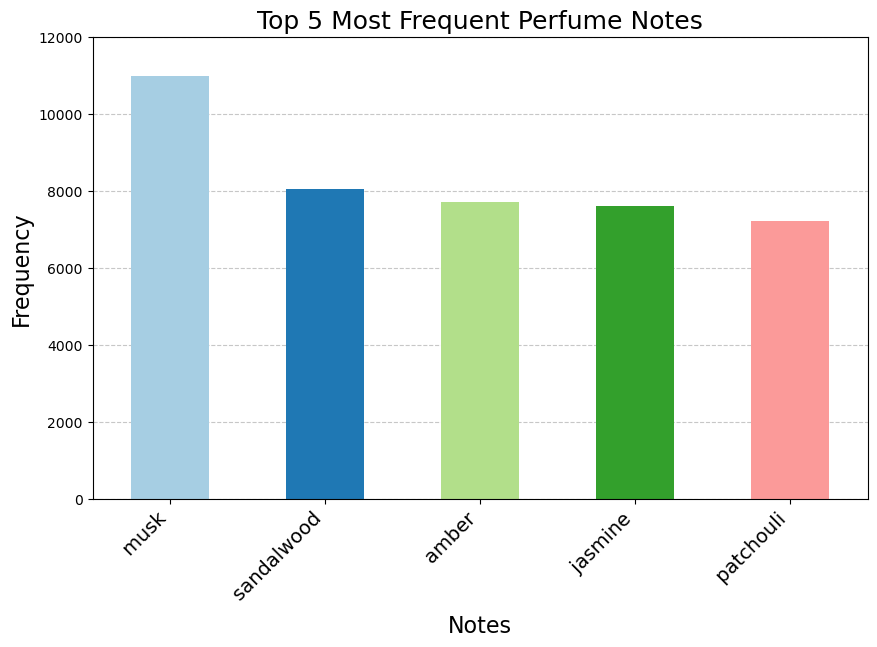

In [57]:
## bar chart for most frequent notes

for_poster['notes'] = for_poster['notes'].astype(str)
for_poster['notes'] = for_poster['notes'].str.lower().str.split(',')

# flatten, remove extra spaces, and clean any extra characters
all_notes = [note for sublist in for_poster['notes'] for note in sublist]  

note_counts = pd.Series(all_notes).value_counts()  

# color list
colors = plt.cm.Paired(range(len(note_counts.head(5))))



plt.figure(figsize=(10, 6))
note_counts.head(5).plot(kind='bar', color=colors, zorder = 2)  
plt.ylim((0,12000))
plt.title('Top 5 Most Frequent Perfume Notes', fontsize = 18)
plt.xlabel('Notes', fontsize = 16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14) 
plt.grid(True, axis='y', linestyle='--', alpha=0.7, zorder = 0) 

plt.show()


In [58]:
note_counts

 musk                  10983
 sandalwood             8041
 amber                  7704
 jasmine                7600
 patchouli              7220
                       ...  
 physcool®                 1
 cep                       1
 dodecanal                 1
singapore patchouli        1
 blackcurrant              1
Name: count, Length: 2472, dtype: int64

## bar chart of most expensive fragrance brands

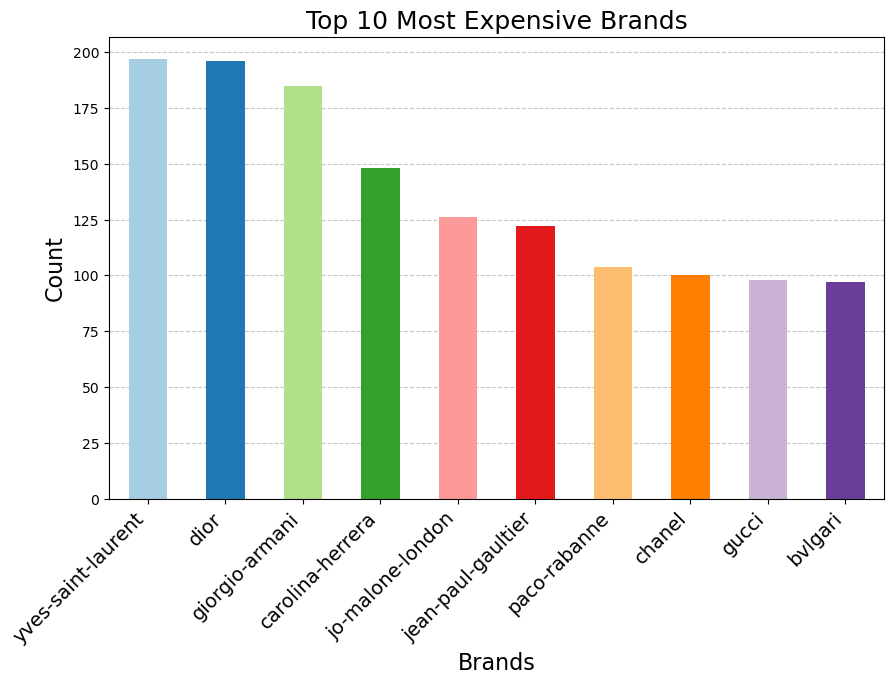

In [59]:

filtered_df = for_poster[for_poster['brand'].isin(luxury_brands)]

brand_counts = filtered_df['brand'].value_counts()


colors = plt.cm.Paired(range(len(brand_counts.head(10))))

plt.figure(figsize=(10, 6))
brand_counts.head(10).plot(kind='bar', color=colors, zorder = 2)  
plt.title('Top 10 Most Expensive Brands', fontsize = 18)
plt.xlabel('Brands', fontsize = 16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7, zorder = 0) 


## plotting MLP model results in python to create visual matrix

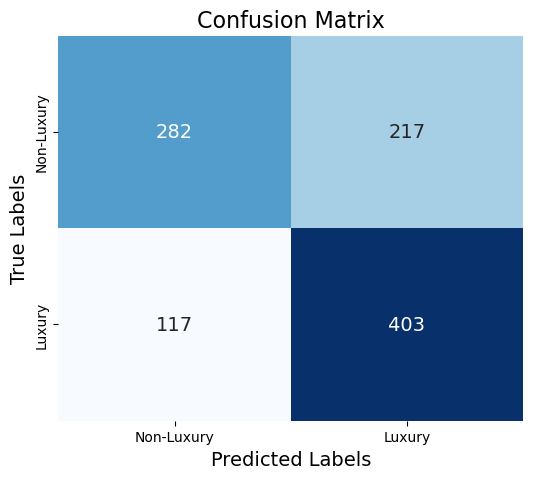

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

vals = pd.read_csv('y_true_y_pred.csv')
y_true = vals['True_Labels']
y_pred = vals['Predicted_Labels']

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

cm_df = pd.DataFrame(cm, index=["Non-Luxury", "Luxury"], columns=["Non-Luxury", "Luxury"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("True Labels", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=14)
plt.show()